In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline

In [2]:
data = pd.read_excel('Week2_challenge_data_source.xlsx')

In [3]:
print("Column Names:")
print("----------------")
for col in data.columns:
    print(col+" ("+str(data[col].dtype)+")")
print("----------------")

Column Names:
----------------
Bearer Id (object)
Start (datetime64[ns])
Start ms (float64)
End (datetime64[ns])
End ms (float64)
Dur. (ms) (float64)
IMSI (float64)
MSISDN/Number (float64)
IMEI (float64)
Last Location Name (object)
Avg RTT DL (ms) (float64)
Avg RTT UL (ms) (float64)
Avg Bearer TP DL (kbps) (float64)
Avg Bearer TP UL (kbps) (float64)
TCP DL Retrans. Vol (Bytes) (float64)
TCP UL Retrans. Vol (Bytes) (float64)
DL TP < 50 Kbps (%) (float64)
50 Kbps < DL TP < 250 Kbps (%) (float64)
250 Kbps < DL TP < 1 Mbps (%) (float64)
DL TP > 1 Mbps (%) (float64)
UL TP < 10 Kbps (%) (float64)
10 Kbps < UL TP < 50 Kbps (%) (float64)
50 Kbps < UL TP < 300 Kbps (%) (float64)
UL TP > 300 Kbps (%) (float64)
HTTP DL (Bytes) (float64)
HTTP UL (Bytes) (float64)
Activity Duration DL (ms) (float64)
Activity Duration UL (ms) (float64)
Dur. (ms).1 (float64)
Handset Manufacturer (object)
Handset Type (object)
Nb of sec with 125000B < Vol DL (float64)
Nb of sec with 1250B < Vol UL < 6250B (float64)
Nb

#### Identifying and Handling outlier and null Values in User's Experience Metric Variables

In [4]:
data_copy = data.copy()

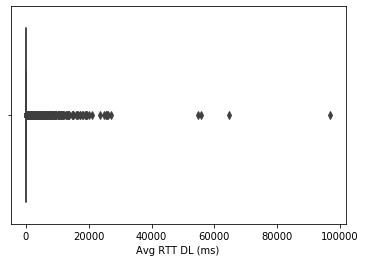

In [5]:
mode = data_copy['Avg RTT DL (ms)'].mode().values[0]
data_copy['Avg RTT DL (ms)'].fillna(value=mode, inplace=True)
sns.boxplot(x=data_copy['Avg RTT DL (ms)'])
plt.show()

In [6]:
Q1=data_copy['Avg RTT DL (ms)'].quantile(0.25)
Q3=data_copy['Avg RTT DL (ms)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

28.0
227.0
199.0
-270.5 525.5


In [7]:
data_copy = data_copy[data_copy['Avg RTT DL (ms)'] < Upper_Whisker]

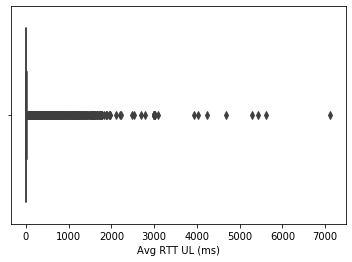

In [8]:
mode = data_copy['Avg RTT UL (ms)'].mode().values[0]
data_copy['Avg RTT UL (ms)'].fillna(value=mode, inplace=True)
sns.boxplot(x=data_copy['Avg RTT UL (ms)'])
plt.show()

In [9]:
Q1=data_copy['Avg RTT UL (ms)'].quantile(0.25)
Q3=data_copy['Avg RTT UL (ms)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

3.0
44.0
41.0
-58.5 105.5


In [10]:
data_copy = data_copy[data_copy['Avg RTT UL (ms)'] < Upper_Whisker]

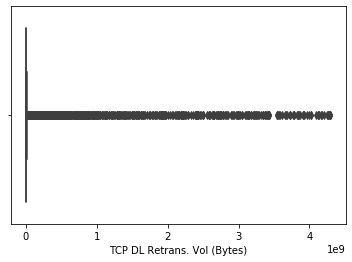

In [11]:
sns.boxplot(x=data_copy['TCP DL Retrans. Vol (Bytes)'])

In [12]:
Q1=data_copy['TCP DL Retrans. Vol (Bytes)'].quantile(0.25)
Q3=data_copy['TCP DL Retrans. Vol (Bytes)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

32945.0
38207183.29999989
38174238.29999989
-57228412.44999984 95468540.74999973


In [13]:
data_copy = data_copy[data_copy['TCP DL Retrans. Vol (Bytes)'] < Upper_Whisker]

In [14]:
Q1=data_copy['TCP UL Retrans. Vol (Bytes)'].quantile(0.25)
Q3=data_copy['TCP UL Retrans. Vol (Bytes)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

5320.0
685820.2499999985
680500.2499999985
-1015430.3749999977 1706570.6249999963


In [15]:
data_copy = data_copy[data_copy['TCP UL Retrans. Vol (Bytes)'] < Upper_Whisker]

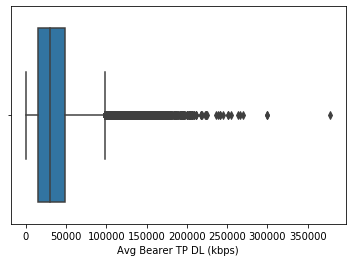

In [16]:
sns.boxplot(x=data_copy['Avg Bearer TP DL (kbps)'])
plt.show()

In [17]:
Q1=data_copy['Avg Bearer TP DL (kbps)'].quantile(0.25)
Q3=data_copy['Avg Bearer TP DL (kbps)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

15614.0
87146.0
71532.0
-91684.0 194444.0


In [18]:
data_copy = data_copy[data_copy['Avg Bearer TP DL (kbps)'] < Upper_Whisker]

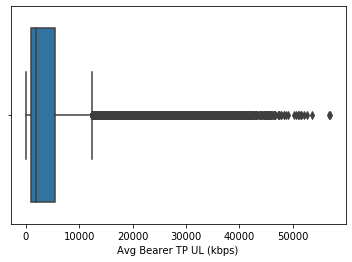

In [19]:
sns.boxplot(x=data_copy['Avg Bearer TP UL (kbps)'])
plt.show()

In [20]:
Q1=data_copy['Avg Bearer TP UL (kbps)'].quantile(0.25)
Q3=data_copy['Avg Bearer TP UL (kbps)'].quantile(0.95)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

902.0
19439.4
18537.4
-26904.100000000002 47245.5


In [21]:
data_copy = data_copy[data_copy['Avg Bearer TP UL (kbps)'] < Upper_Whisker]

In [22]:
data_copy['Average_TCPR_MB'] = (data_copy['TCP UL Retrans. Vol (Bytes)'] + data_copy['TCP DL Retrans. Vol (Bytes)'])/1000000
data_copy['Average_RTT_ms'] = data_copy['Avg RTT UL (ms)'] + data_copy['Avg RTT DL (ms)']
data_copy['Average_TP_kbps'] = data_copy['Avg Bearer TP UL (kbps)'] + data_copy['Avg Bearer TP DL (kbps)']

In [23]:
table = pd.pivot_table(data_copy, index=['MSISDN/Number', 'Handset Type'], values=['Average_TCPR_MB','Average_RTT_ms',
                                                                                  'Average_TP_kbps'], aggfunc=np.sum)
table

Average_RTT_ms  \
MSISDN/Number Handset Type                                                       
3.360101e+10  Apple iPhone Se (A1723)                                     91.0   
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10            39.0   
3.360102e+10  Apple iPhone 7 Plus (A1784)                                160.0   
3.360103e+10  Apple iPhone 8 Plus (A1897)                                 60.0   
              Apple iPhone 6S (A1688)                                     86.0   
...                                                                        ...   
3.378991e+10  Apple iPhone Se (A1723)                                     70.0   
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                          128.0   
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                               52.0   
3.378998e+10  undefined                                                   69.0   
3.379000e+10  Huawei Honor 9 Lite                                         52.0   

                                                                Average_TCPR_MB  \
MSISDN/Number Handset Type                                                        
3.360101e+10  Apple iPhone Se (A1723)                                  9.370832   
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10         0.110232   
3.360102e+10  Apple iPhone 7 Plus (A1784)                             14.594645   
3.360103e+10  Apple iPhone 8 Plus (A1897)                              2.325497   
              Apple iPhone 6S (A1688)                                  0.002379   
...                                                                         ...   
3.378991e+10  Apple iPhone Se (A1723)                                  2.734889   
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                        1.229545   
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                            2.804004   
3.378998e+10  undefined                                                0.010096   
3.379000e+10  Huawei Honor 9 Lite                                      0.218045   

                                                                Average_TP_kbps  
MSISDN/Number Handset Type                                                       
3.360101e+10  Apple iPhone Se (A1723)                                   56781.0  
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10          42416.0  
3.360102e+10  Apple iPhone 7 Plus (A1784)                               19256.0  
3.360103e+10  Apple iPhone 8 Plus (A1897)                               38190.0  
              Apple iPhone 6S (A1688)                                     103.0  
...                                                                         ...  
3.378991e+10  Apple iPhone Se (A1723)                                     554.0  
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                         43305.0  
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                            141312.0  
3.378998e+10  undefined                                                162985.0  
3.379000e+10  Huawei Honor 9 Lite                                       10365.0  

[35289 rows x 3 columns]

In [24]:
datamart = pd.DataFrame(table)
datamart

Average_RTT_ms  \
MSISDN/Number Handset Type                                                       
3.360101e+10  Apple iPhone Se (A1723)                                     91.0   
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10            39.0   
3.360102e+10  Apple iPhone 7 Plus (A1784)                                160.0   
3.360103e+10  Apple iPhone 8 Plus (A1897)                                 60.0   
              Apple iPhone 6S (A1688)                                     86.0   
...                                                                        ...   
3.378991e+10  Apple iPhone Se (A1723)                                     70.0   
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                          128.0   
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                               52.0   
3.378998e+10  undefined                                                   69.0   
3.379000e+10  Huawei Honor 9 Lite                                         52.0   

                                                                Average_TCPR_MB  \
MSISDN/Number Handset Type                                                        
3.360101e+10  Apple iPhone Se (A1723)                                  9.370832   
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10         0.110232   
3.360102e+10  Apple iPhone 7 Plus (A1784)                             14.594645   
3.360103e+10  Apple iPhone 8 Plus (A1897)                              2.325497   
              Apple iPhone 6S (A1688)                                  0.002379   
...                                                                         ...   
3.378991e+10  Apple iPhone Se (A1723)                                  2.734889   
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                        1.229545   
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                            2.804004   
3.378998e+10  undefined                                                0.010096   
3.379000e+10  Huawei Honor 9 Lite                                      0.218045   

                                                                Average_TP_kbps  
MSISDN/Number Handset Type                                                       
3.360101e+10  Apple iPhone Se (A1723)                                   56781.0  
              Huawei Mate 10 Pro Porsche Design Huawei Mate 10          42416.0  
3.360102e+10  Apple iPhone 7 Plus (A1784)                               19256.0  
3.360103e+10  Apple iPhone 8 Plus (A1897)                               38190.0  
              Apple iPhone 6S (A1688)                                     103.0  
...                                                                         ...  
3.378991e+10  Apple iPhone Se (A1723)                                     554.0  
3.378992e+10  Samsung Galaxy S7 Edge (Sm-G935X)                         43305.0  
3.378994e+10  Samsung Galaxy S9 Sm-G960F Ds                            141312.0  
3.378998e+10  undefined                                                162985.0  
3.379000e+10  Huawei Honor 9 Lite                                       10365.0  

[35289 rows x 3 columns]

##  TCP VALUES IN THE DATASET

In [25]:
#Top 10 TCP values in the dataset
top10 = datamart.sort_values('Average_TCPR_MB', ascending=False).head(10)
top10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.366365e+10,Huawei B528S-23A,512.0,321.607586,155596.0
3.366564e+10,Huawei B528S-23A,660.0,292.942349,179941.0
3.365883e+10,Huawei B528S-23A,676.0,268.439386,142130.0
3.366141e+10,Huawei B528S-23A,307.0,253.777985,220817.0
3.369931e+10,Huawei B528S-23A,431.0,231.112086,233264.0
3.369925e+10,Huawei B528S-23A,549.0,207.935588,520268.0
3.366222e+10,Huawei E5180,767.0,205.314861,182617.0
3.365913e+10,Huawei B528S-23A,768.0,204.762965,69925.0
3.369975e+10,Huawei B528S-23A,958.0,202.841656,437969.0


In [26]:
#Bottom 10 TCP values in the dataset
bottom10 = datamart.sort_values('Average_TCPR_MB', ascending=True).head(10)
bottom10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.365013e+10,Apple iPhone 5S (A1457),48.0,0.000097,30581.0
3.365940e+10,Apple iPhone 6 (A1586),56.0,0.000108,5055.0
3.364108e+10,Apple iPhone 6 (A1549),81.0,0.000113,251.0
3.361478e+10,Huawei Ascend Mate7,64.0,0.000128,8654.0
3.376206e+10,Apple iPhone 8 (A1905),41.0,0.000129,32577.0
3.362636e+10,Apple iPhone 7 (A1778),40.0,0.000134,10964.0
3.376826e+10,undefined,59.0,0.000134,4803.0
3.360783e+10,Apple iPhone 5C (A1529),32.0,0.000143,16853.0
3.365177e+10,Apple iPhone 6 (A1586),113.0,0.000175,13934.0


In [27]:
#Top 10 frequent TCP values in the dataset
top10_frequent = (datamart['Average_TCPR_MB'].value_counts().sort_values(ascending=False)).head(10)
top10_frequent

0.002660    22
0.005320    21
0.006650    18
0.003990    16
0.007980    13
0.001873     9
0.002648     8
0.011970     8
0.002385     7
0.010640     7
Name: Average_TCPR_MB, dtype: int64

##  RTT VALUES IN THE DATASET

In [28]:
#Top 10 RTT values in the dataset.
top10 = datamart.sort_values('Average_RTT_ms', ascending=False).head(10)
top10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.366440e+10,Huawei B528S-23A,1735.0,59.073238,182269.0
3.366183e+10,Huawei B528S-23A,1688.0,13.361508,41536.0
3.366267e+10,Huawei B528S-23A,1685.0,178.118486,283584.0
3.366104e+10,Huawei E5180,1643.0,47.975308,63746.0
3.366471e+10,Huawei B528S-23A,1511.0,38.971979,225255.0
3.376125e+10,Huawei B528S-23A,1489.0,150.414507,240239.0
3.365971e+10,Huawei B528S-23A,1456.0,24.349843,250807.0
3.366391e+10,Huawei B528S-23A,1446.0,64.127058,186591.0
3.369815e+10,Huawei B528S-23A,1428.0,155.044329,213156.0


In [29]:
#Bottom 10 RTT values in the dataset
bottom10 = datamart.sort_values('Average_RTT_ms', ascending=True).head(10)
bottom10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.366061e+10,Samsung Galaxy A6 Sm-A600Fn Ds,19.0,0.055751,1025.0
3.367530e+10,Huawei P8 Lite,20.0,0.002939,4139.0
3.367283e+10,Huawei P8 Lite,20.0,0.017794,6181.0
3.376043e+10,Apple iPhone Se (A1723),21.0,0.023109,66869.0
3.366397e+10,Samsung Galaxy J5 (Sm-J530),21.0,4.303650,806.0
3.369985e+10,Apple iPhone 6 (A1586),21.0,0.004459,3625.0
3.366778e+10,undefined,21.0,0.050418,2771.0
3.378299e+10,Huawei P9 Lite,21.0,0.002011,3116.0
3.366213e+10,Huawei P10 Lite,21.0,2.052940,26991.0


In [30]:
#Top 10 frequent RTT values in the dataset
top10_frequent = (datamart['Average_RTT_ms'].value_counts().sort_values(ascending=False)).head(10)
top10_frequent

49.0    464
52.0    435
48.0    432
46.0    429
44.0    420
55.0    418
50.0    409
51.0    406
47.0    401
43.0    399
Name: Average_RTT_ms, dtype: int64

##  THROUGHPUT VALUES IN THE DATASET

In [31]:
#Top 10 TP values in the dataset.
top10 = datamart.sort_values('Average_TP_kbps', ascending=False).head(10)
top10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.366871e+10,Huawei B528S-23A,500.0,142.987086,840424.0
3.365955e+10,Huawei B528S-23A,512.0,33.901054,746139.0
3.366995e+10,Huawei B528S-23A,370.0,62.717561,690815.0
3.365808e+10,Huawei B528S-23A,567.0,28.784094,550352.0
3.366646e+10,Huawei B528S-23A,543.0,12.325061,524686.0
3.369925e+10,Huawei B528S-23A,549.0,207.935588,520268.0
3.369894e+10,Huawei B528S-23A,526.0,46.310167,492358.0
3.366050e+10,Huawei B528S-23A,450.0,21.284363,478037.0
3.376374e+10,Huawei B528S-23A,467.0,69.455152,468404.0


In [32]:
#Bottom 10 TP values in the dataset
bottom10 = datamart.sort_values('Average_TP_kbps', ascending=True).head(10)
bottom10

,,Average_RTT_ms,Average_TCPR_MB,Average_TP_kbps
MSISDN/Number,Handset Type,,,
3.366911e+10,Apple iPhone 8 (A1905),209.0,0.012710,52.0
3.364632e+10,Apple iPhone 6 (A1586),198.0,0.005182,58.0
3.365072e+10,Apple iPhone 6 (A1586),283.0,0.010224,59.0
3.366025e+10,Wiko Global Sasu Harry2,222.0,0.004156,61.0
3.362416e+10,Apple iPhone 6S (A1688),527.0,0.008936,62.0
3.367703e+10,Apple iPhone 7 (A1778),302.0,0.016838,65.0
3.376154e+10,Zte Mf259,64.0,0.001322,66.0
3.366121e+10,Apple iPhone 6S (A1688),228.0,0.011732,70.0
3.361232e+10,Apple iPhone 5S (A1457),334.0,0.030362,70.0


In [33]:
#Top 10 frequent TP values in the dataset
top10_frequent = (datamart['Average_TP_kbps'].value_counts().sort_values(ascending=False)).head(10)
top10_frequent

362.0      7
501.0      6
460.0      6
19725.0    5
496.0      5
522.0      5
199.0      5
693.0      5
516.0      5
594.0      5
Name: Average_TP_kbps, dtype: int64

In [34]:
table = pd.pivot_table(data_copy, index=['Handset Type'], values=['Average_TP_kbps'], aggfunc=np.sum)

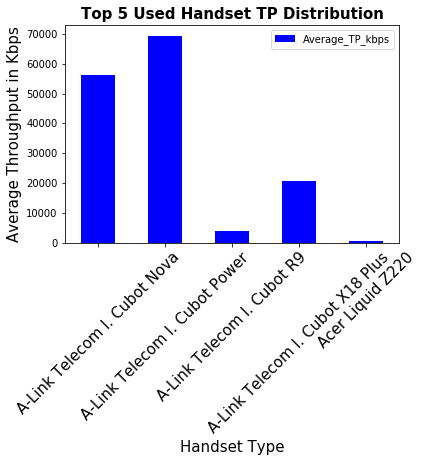

In [35]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Handset Type', fontsize=15)
ax.set_ylabel('Average Throughput in Kbps' , fontsize=15)
ax.set_title('Top 5 Used Handset TP Distribution', fontsize=15, fontweight='bold')
table[:5].plot(ax=ax, kind='bar', color='blue', rot=45)
plt.show()

In [36]:
table = pd.pivot_table(data_copy, index=['Handset Type'], values=['Average_TCPR_MB'], aggfunc=np.sum)

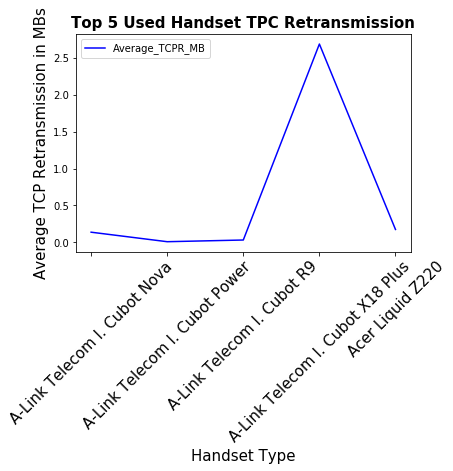

In [37]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Handset Type', fontsize=15)
ax.set_ylabel('Average TCP Retransmission in MBs' , fontsize=15)
ax.set_title('Top 5 Used Handset TPC Retransmission', fontsize=15, fontweight='bold')
table[:5].plot(ax=ax, color='blue', rot=45)
plt.show()

# # KMeans Clustering 

In [69]:
result1 = data_copy.groupby('MSISDN/Number')[['Handset Type']].count()
df1 = pd.DataFrame(result1)
df1

,Handset Type
MSISDN/Number,
3.360101e+10,1
3.360101e+10,1
3.360102e+10,1
3.360103e+10,1
3.360103e+10,1
...,...
3.378991e+10,1
3.378992e+10,1
3.378994e+10,1


In [70]:
result2 = data_copy.groupby('MSISDN/Number').agg({'Average_TCPR_MB':sum,
                                                 'Average_RTT_ms':sum,
                                                 'Average_TP_kbps':sum})
df2 = pd.DataFrame(result2)
df2

,Average_TCPR_MB,Average_RTT_ms,Average_TP_kbps
MSISDN/Number,,,
3.360101e+10,9.370832,91.0,56781.0
3.360101e+10,0.110232,39.0,42416.0
3.360102e+10,14.594645,160.0,19256.0
3.360103e+10,2.325497,60.0,38190.0
3.360103e+10,0.002379,86.0,103.0
...,...,...,...
3.378991e+10,2.734889,70.0,554.0
3.378992e+10,1.229545,128.0,43305.0
3.378994e+10,2.804004,52.0,141312.0


In [71]:
metrics = pd.merge(df1, df2, on='MSISDN/Number')
metrics

,Handset Type,Average_TCPR_MB,Average_RTT_ms,Average_TP_kbps
MSISDN/Number,,,,
3.360101e+10,1,9.370832,91.0,56781.0
3.360101e+10,1,0.110232,39.0,42416.0
3.360102e+10,1,14.594645,160.0,19256.0
3.360103e+10,1,2.325497,60.0,38190.0
3.360103e+10,1,0.002379,86.0,103.0
...,...,...,...,...
3.378991e+10,1,2.734889,70.0,554.0
3.378992e+10,1,1.229545,128.0,43305.0
3.378994e+10,1,2.804004,52.0,141312.0


In [72]:
metrics.isnull().sum()

Handset Type       0
Average_TCPR_MB    0
Average_RTT_ms     0
Average_TP_kbps    0
dtype: int64

In [42]:
metrics.shape

(35288, 4)

In [73]:
metrics.drop_duplicates(inplace=True)
metrics.shape

(35288, 4)

In [44]:
metrics.describe()

,Handset Type,Average_TCPR_MB,Average_RTT_ms,Average_TP_kbps
count,35288.000000,35288.000000,35288.000000,35288.000000
mean,1.248385,6.654275,137.626842,49973.037066
std,0.708436,16.472412,138.048741,50348.032800
min,1.000000,0.000097,19.000000,52.000000
25%,1.000000,0.112465,55.000000,17022.000000
50%,1.000000,0.928119,86.000000,37010.000000
75%,1.000000,4.820324,163.000000,65806.250000
max,10.000000,321.607586,1735.000000,840424.000000


In [45]:
x = metrics.iloc[:, [3,2,1]].values

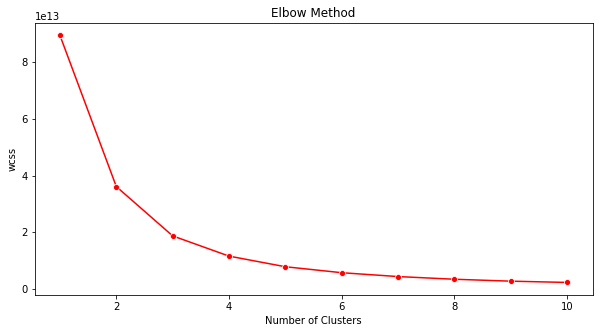

In [46]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [47]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 410)
y_kmeans = kmeans.fit_predict(x)

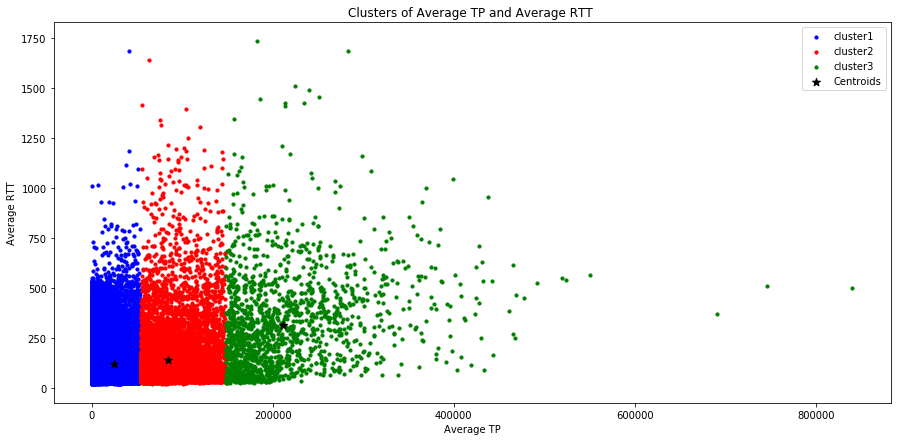

In [48]:
# Visualising the clusters
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=10, c='blue', label= 'cluster1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=10, c='red', label= 'cluster2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=10, c='green', label= 'cluster3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=70, c='black', label='Centroids' )
plt.title('Clusters of Average TP and Average RTT ')
plt.xlabel('Average TP')
plt.ylabel('Average RTT')
plt.legend()
plt.show()

## SATISFACTION ANALYSIS 

### Engagement & Experience scores

In [64]:
bytes = 1000000
data_copy['total_Social_media'] = (data_copy['Social Media DL (Bytes)'] + data_copy['Social Media UL (Bytes)'])/bytes
data_copy['total_Google'] = (data_copy['Google UL (Bytes)'] + data_copy['Google DL (Bytes)'])/bytes
data_copy['total_Email'] = (data_copy['Email UL (Bytes)'] + data_copy['Email DL (Bytes)'])/bytes
data_copy['total_Youtube'] = (data_copy['Youtube DL (Bytes)'] + data_copy['Youtube UL (Bytes)'])/bytes
data_copy['total_Netflix'] = (data_copy['Netflix DL (Bytes)'] + data_copy['Netflix UL (Bytes)'])/bytes
data_copy['total_Gaming'] = (data_copy['Gaming DL (Bytes)'] + data_copy['Gaming UL (Bytes)'])/bytes
data_copy['total_Other'] = (data_copy['Other DL (Bytes)'] + data_copy['Other UL (Bytes)'])/bytes
data_copy['Total'] = (data_copy['Total UL (Bytes)'] + data_copy['Total DL (Bytes)'])/bytes


data_copy.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Duration_Minutes,total_Social_media,total_Google,total_Email,total_Youtube,total_Netflix,total_Gaming,total_Other,Total,Duration_min
9,13042425914669299712,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,14.408038,1.585413,8.778341,0.766046,22.911539,13.185350,812.946425,77.671250,872.988322,14.408038
11,13114483557479700480,2019-04-15 11:33:39,626.0,2019-04-25 18:44:14,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,14.830582,0.839351,8.822396,2.348652,19.623308,20.124838,505.668618,538.369717,568.809782,14.830582


#### Engagement Score

In [77]:
return1 = data_copy.groupby('MSISDN/Number')[['Bearer Id']].count()
df1 = pd.DataFrame(return1)

return2 = data_copy.groupby('MSISDN/Number').agg({'Duration_Minutes': np.sum, 'Total': np.sum})
df2 = pd.DataFrame(return2)

dataset1= pd.merge(df1, df2, on='MSISDN/Number')
dataset1 = dataset1.dropna()
dataset1.head(2)



,Bearer Id,Duration_Minutes,Total
MSISDN/Number,,,
3.360101e+10,1,0.309255,871.832580
3.360101e+10,1,1.069673,199.050991


In [78]:
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist



points = dataset1[['Bearer Id', 'Duration_Minutes', 'Total']]
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
dataset1['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['distEngage_{}'.format(i) for i in range(len(centroids))],
    index=metrics.index)
dataset1 = pd.concat([dataset1, dists], axis=1)

dataset1['Engagement_Score'] = (dataset1['distEngage_0'] + dataset1['distEngage_1'] + dataset1['distEngage_2'])/3
dataset1.head(2)

,Bearer Id,Duration_Minutes,Total,cluster,distEngage_0,distEngage_1,distEngage_2,Engagement_Score
MSISDN/Number,,,,,,,,
3.360101e+10,1,0.309255,871.832580,2,560.712052,1071.855546,97.113319,576.560306
3.360101e+10,1,1.069673,199.050991,0,112.070148,1744.627002,575.676047,810.791065


##### Experience Score

In [79]:
points = metrics[['Average_TCPR_MB', 'Average_RTT_ms', 'Average_TP_kbps']]
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(points)
metrics['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['distExpe_{}'.format(i) for i in range(len(centroids))],
    index=metrics.index)
metrics = pd.concat([metrics, dists], axis=1)
metrics.head(2)



,Handset Type,Average_TCPR_MB,Average_RTT_ms,Average_TP_kbps,cluster,distExpe_0,distExpe_1,distExpe_2
MSISDN/Number,,,,,,,,
3.360101e+10,1,9.370832,91.0,56781.0,1,32541.029207,27167.838172,155233.241577
3.360101e+10,1,0.110232,39.0,42416.0,0,18176.208151,41532.919075,169598.306171


In [81]:
metrics['Experience_Score'] = (metrics['distExpe_0'] + metrics['distExpe_1'] + metrics['distExpe_2'])/3
metrics.head(2)

,Handset Type,Average_TCPR_MB,Average_RTT_ms,Average_TP_kbps,cluster,distExpe_0,distExpe_1,distExpe_2,Experience_Score
MSISDN/Number,,,,,,,,,
3.360101e+10,1,9.370832,91.0,56781.0,1,32541.029207,27167.838172,155233.241577,71647.369652
3.360101e+10,1,0.110232,39.0,42416.0,0,18176.208151,41532.919075,169598.306171,76435.811133


In [84]:
datamart = pd.merge(metrics, dataset1, on='MSISDN/Number')
datamart['Satisfaction_Score'] = (datamart['Experience_Score'] + datamart['Engagement_Score'])/2

##### Top Satisfied Users

In [90]:
sorted_datamart = datamart.sort_values('Satisfaction_Score', ascending=False).head(10) 
top10_satisfied = sorted_datamart[['Satisfaction_Score']]
top10_satisfied

,Satisfaction_Score
MSISDN/Number,
3.366871e+10,367509.555904
3.365955e+10,321503.596202
3.366995e+10,292524.932020
3.365808e+10,222405.271503
3.366646e+10,209645.735947
3.369925e+10,208138.382733
3.369894e+10,193363.073153
3.366050e+10,186367.867694
3.376374e+10,181629.777422


#### Multiple Linear Regression To predict Satisfaction Score of a customer

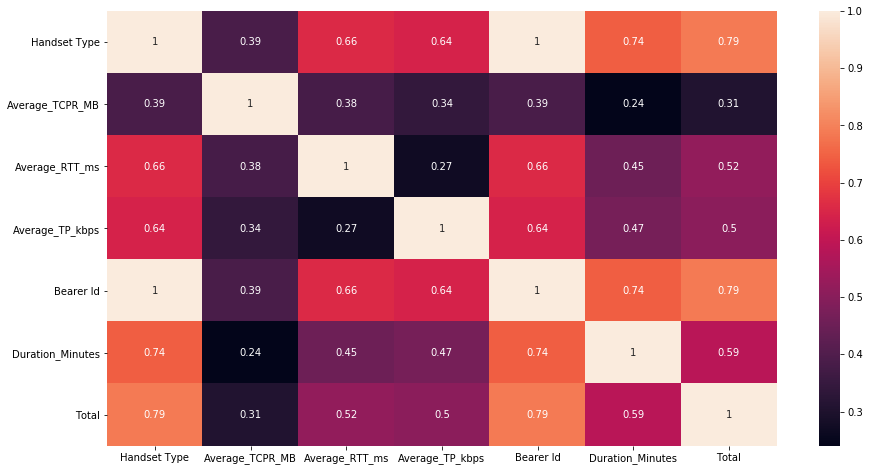

In [94]:
dataset = datamart[['Handset Type', 'Average_TCPR_MB', 'Average_RTT_ms', 'Average_TP_kbps',
                   'Bearer Id', 'Duration_Minutes', 'Total']]
corr = dataset.corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

###### The Session ID and the Handset Type, have a correlation of 1 hence we drop the Session ID in our model

In [96]:
import statsmodels.api as sm

X = datamart[['Handset Type', 'Average_TCPR_MB', 'Average_RTT_ms', 'Average_TP_kbps','Duration_Minutes', 'Total']]
Y = datamart['Satisfaction_Score']

X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Satisfaction_Score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     465.3
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        08:03:15   Log-Likelihood:            -3.7194e+05
No. Observations:               35288   AIC:                         7.439e+05
Df Residuals:                   35281   BIC:                         7.440e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.778e+04    109.443  

##### Kmeans Clustering 

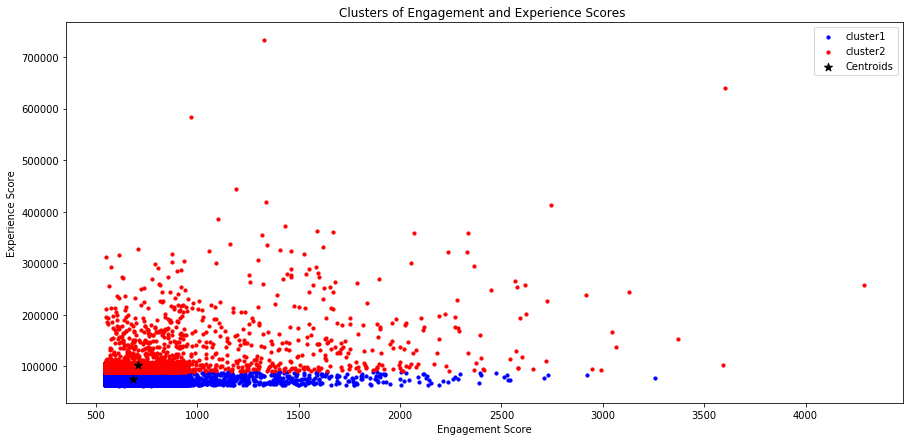

In [102]:
X = datamart[["Engagement_Score","Experience_Score"]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 410)
Y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(15,7))
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=10, c='blue', label= 'cluster1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=10, c='red', label= 'cluster2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=70, c='black', label='Centroids' )
plt.title('Clusters of Engagement and Experience Scores ')
plt.xlabel('Engagement Score')
plt.ylabel('Experience Score')
plt.legend()
plt.show()